In [8]:
from skimage import io, img_as_float
from matplotlib import pyplot as plt
from skimage.color import rgb2gray
import cv2

import numpy as np
img = cv2.imread("pasta.jpg", 0)

from skimage.filters import roberts, sobel, scharr, prewitt, farid

roberts_img = roberts(img)
sobel_img = sobel(img)
scharr_img = scharr(img)
prewitt_img = prewitt(img)
farid_img = farid(img)

cv2.imshow("Robert",roberts_img)

cv2.imshow("sobel_img",sobel_img)
cv2.imshow("scharr_img",scharr_img)
cv2.imshow("prewitt_img",prewitt_img)
cv2.imshow("farid_img",farid_img)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [9]:
from skimage import io, filters, feature
from matplotlib import pyplot as plt
from skimage.color import rgb2gray
import cv2
import numpy as np
img = cv2.imread("ramadan.jpg", 0)

canny_edge = cv2.Canny(img, 50, 80)
sigma= 0.3
median = np.median(img)

lower  = int(max(0, (1.0-sigma)*median))
upper  = int(min(255, (1.0+sigma)*median))
auto_canny = cv2.Canny(img, lower, upper)

cv2.imshow("Canny", canny_edge)
cv2.imshow("Auto Canny", auto_canny)

cv2.waitKey(0)
cv2.destroyAllWindows()

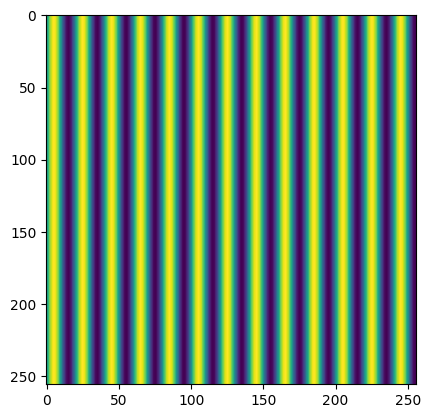

In [11]:

import cv2
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
x=np.arange(256)
y=np.sin(2*np.pi*x/20)
y+=max(y)
img=np.array([[y[j]*127 for j in range(256)] for i in range(256)],dtype=np.uint8)
plt.imshow(img)


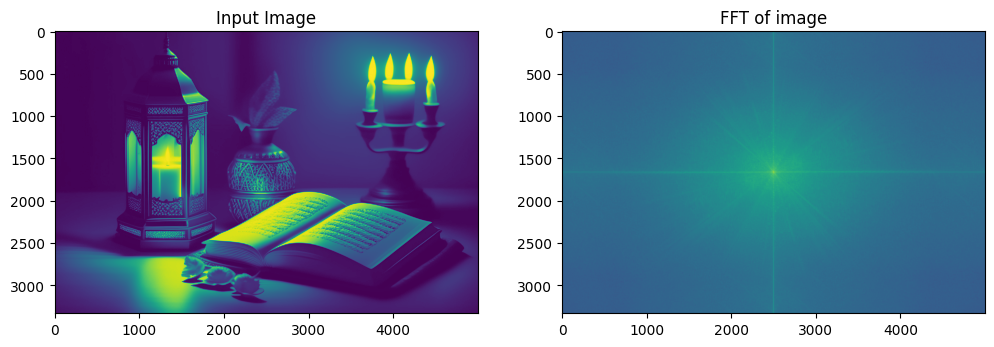

In [6]:
img=cv2.imread('ramadan.jpg',0)
dft=cv2.dft(np.float32(img),flags=cv2.DFT_COMPLEX_OUTPUT)
dft_shift=np.fft.fftshift(dft)
magnitude_spectrum=20*np.log((cv2.magnitude(dft_shift[:,:,0],dft_shift[:,:,1]))+1)

fig=plt.figure(figsize=(12,12))
ax1=fig.add_subplot(2,2,1)
ax1.imshow(img)
ax1.title.set_text("Input Image")
ax2=fig.add_subplot(2,2,2)
ax2.imshow(magnitude_spectrum)
ax2.title.set_text("FFT of image")
plt.show()

C:\Users\USER\AppData\Local\Temp\ipykernel_7444\2578228958.py:47: RuntimeWarning: divide by zero encountered in log
  fshift_mask_mag = 20 * np.log(cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1]))


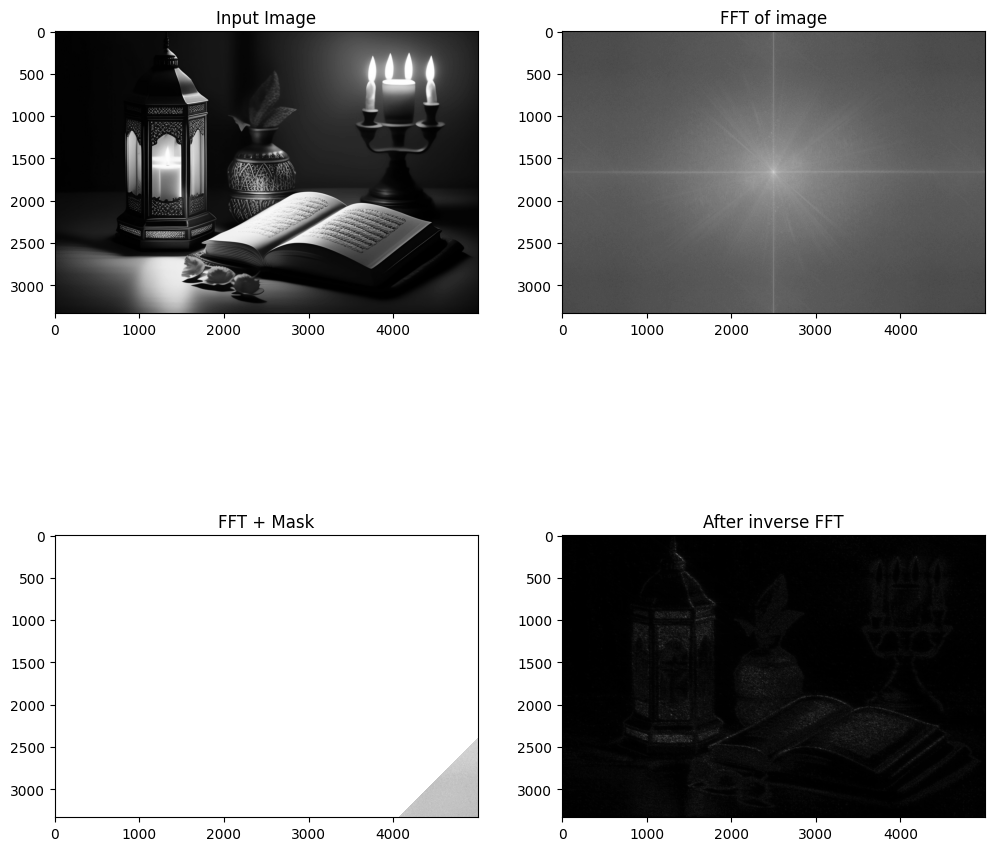

In [7]:
rows, cols = img.shape
crow, ccol = int(rows / 2), int(cols / 2)

mask = np.ones((rows, cols, 2), np.uint8)
r = 80
center = [crow, ccol]
x, y = np.ogrid[:rows, :cols]
mask_area = (x - center[0]) * 2 + (y - center[1]) * 2 <= r*r
mask[mask_area] = 0


# Circular LPF mask, center circle is 1, remaining all zeros
# Only allows low frequency components - smooth regions
#Can smooth out noise but blurs edges.
#
# """
# rows, cols = img.shape
# crow, ccol = int(rows / 2), int(cols / 2)

# mask = np.zeros((rows, cols, 2), np.uint8)
# r = 100
# center = [crow, ccol]
# x, y = np.ogrid[:rows, :cols]
# mask_area = (x - center[0]) * 2 + (y - center[1]) * 2 <= r*r
# mask[mask_area] = 1

# # Band Pass Filter - Concentric circle mask, only the points living in concentric circle are ones
# rows, cols = img.shape
# crow, ccol = int(rows / 2), int(cols / 2)

# mask = np.zeros((rows, cols, 2), np.uint8)
# r_out = 80
# r_in = 10
# center = [crow, ccol]
# x, y = np.ogrid[:rows, :cols]
# mask_area = np.logical_and(((x - center[0]) * 2 + (y - center[1]) * 2 >= r_in ** 2),
#                            ((x - center[0]) * 2 + (y - center[1]) * 2 <= r_out ** 2))
# mask[mask_area] = 1
# """


# apply mask and inverse DFT: Multiply fourier transformed image (values)
#with the mask values. 
fshift = dft_shift * mask

#Get the magnitude spectrum (only for plotting purposes)
fshift_mask_mag = 20 * np.log(cv2.magnitude(fshift[:, :, 0], fshift[:, :, 1]))

#Inverse shift to shift origin back to top left.
f_ishift = np.fft.ifftshift(fshift)

#Inverse DFT to convert back to image domain from the frequency domain. 
#Will be complex numbers
img_back = cv2.idft(f_ishift)

#Magnitude spectrum of the image domain
img_back = cv2.magnitude(img_back[:, :, 0], img_back[:, :, 1])



fig = plt.figure(figsize=(12, 12))
ax1 = fig.add_subplot(2,2,1)
ax1.imshow(img, cmap='gray')
ax1.title.set_text('Input Image')
ax2 = fig.add_subplot(2,2,2)
ax2.imshow(magnitude_spectrum, cmap='gray')
ax2.title.set_text('FFT of image')
ax3 = fig.add_subplot(2,2,3)
ax3.imshow(fshift_mask_mag, cmap='gray')
ax3.title.set_text('FFT + Mask')
ax4 = fig.add_subplot(2,2,4)
ax4.imshow(img_back, cmap='gray')
ax4.title.set_text('After inverse FFT')
plt.show()